In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# IRIS

In [2]:
dir = "zbiory/iris.data"
iris_data = pd.read_csv(dir, names=["sepal-length", "sepal-width", "petal-length", "petal-width", "class"])
iris_data.head()

sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [3]:
iris_x, iris_y = iris_data.loc[:, iris_data.columns != 'class'], iris_data.loc[:, iris_data.columns == "class"]

### Klasy

class          
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


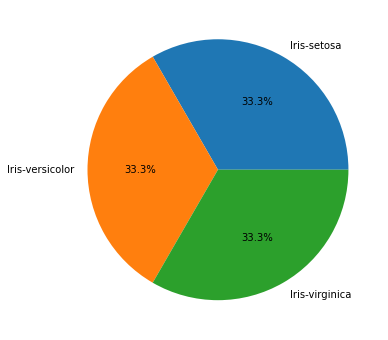

In [4]:
y_counts = iris_y.value_counts()

print(y_counts)

fig = plt.figure(figsize=(6, 6))
fig.set_facecolor('white')
plt.pie(y_counts, labels=y_counts.index.get_level_values(0), autopct='%1.1f%%')
plt.show()

W zbiorze znajdują się trzy różne klasy. Dla każdej z nich w zbiorze jest tyle samo próbek 50.
Każda z klas przedstawia inny podgatunek kwiatu irys:

![alt text](iris-image.png)

### Atrybuty

Każdy kwiat jest reprezentowany poprzez wektor 4 wartości: długość i szerokość kielicha (sepal) oraz długość i szerokość płatka (petal).

In [5]:
iris_x.describe()

sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Na przekątnej przedstawione są histogramy wartości poszczególnych atrybutów z podziałem na klasy.  
W pozostałych komórkach pokazana jest zależność pomiędzy parami atrybutów.

Można zauważyć, że klasa `iris-setosa` jest wizualnie łatwo odzielalna (rozdział można wykonać przy użyciu prostej) od pozostałych dwóch klas.

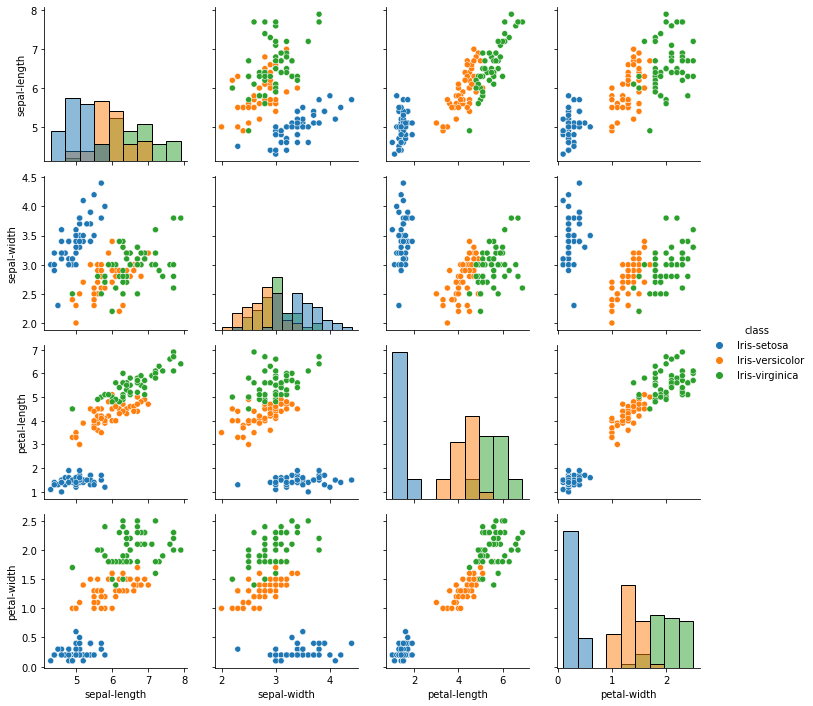

In [6]:
g = sns.PairGrid(iris_data, hue="class")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

### Wykres zależności długości/szerokości płatków

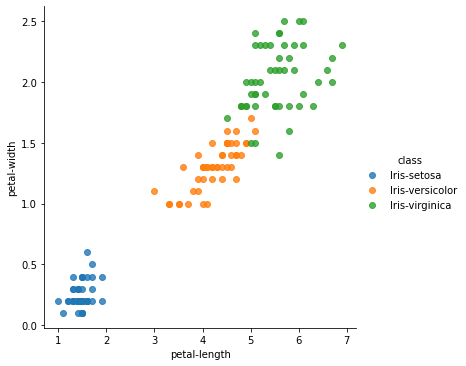

In [7]:
sns.lmplot(x="petal-length", y="petal-width", data=iris_data, hue="class", fit_reg=False)

### PCA - principal component analysis

Standaryzacja danych, aby wszystkie atrybuty były w tej samej skali.

$ \texttt{Standardize}(x) = \frac{x - \mu_x}{\sigma_x} $

In [8]:
x_standardized = StandardScaler().fit_transform(iris_x)

Projekcja danych na 2 pierwsze składowe główne przy użyciu PCA.

In [9]:
pca = PCA(n_components = 2)
x_pc = pca.fit_transform(x_standardized)

x_pc_data = pd.DataFrame(data=x_pc, columns=["pc-1", "pc-2"])
x_pc_data = pd.concat([x_pc_data, iris_y], axis=1)

x_pc_data.head()

pc-1      pc-2        class
0 -2.264542  0.505704  Iris-setosa
1 -2.086426 -0.655405  Iris-setosa
2 -2.367950 -0.318477  Iris-setosa
3 -2.304197 -0.575368  Iris-setosa
4 -2.388777  0.674767  Iris-setosa

Projekcja na 2 główne składowe zachowuje 95.8% wariancji zbioru.

In [10]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.72770452 0.23030523]
0.9580097536148199


Wizualizacja danych po projekcji.

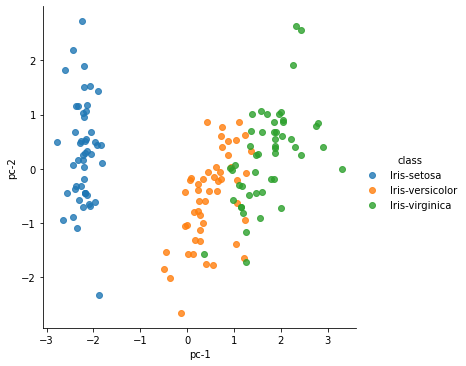

In [11]:
sns.lmplot(x="pc-1", y="pc-2", data=x_pc_data, hue="class", fit_reg=False)

# GLASS

In [12]:
dir = "zbiory/glass.data"
glass_data = pd.read_csv(dir, names=["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "class"]).reset_index()
glass_data = glass_data.drop("index", axis=1)
glass_data.head()

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  class
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0      1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0      1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0      1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0      1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0      1

In [13]:
glass_x, glass_y = glass_data.loc[:, glass_data.columns != 'class'], glass_data.loc[:, glass_data.columns == "class"]

### Klasy

class
1        70
2        76
3        17
5        13
6         9
7        29
dtype: int64


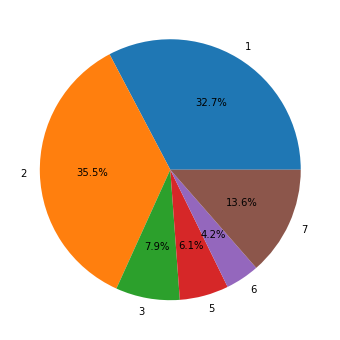

In [14]:
y_counts = glass_y.value_counts().sort_index()

print(y_counts)

fig = plt.figure(figsize=(6, 6))
fig.set_facecolor('white')
plt.pie(y_counts, labels=y_counts.index.get_level_values(0), autopct='%1.1f%%')
plt.show()

Zbiór GLASS w opisie klas zawiera 7 różnych klas typów szkła, jednak w samym zbiorze reprezentowane jest tylko 6 z nich (klasa 4 nie posiada żadnych reprezentantów).  
Osłownikowane klasy:  
1. building_windows_float_processed
2. building_windows_non_float_processed
3. vehicle_windows_float_processed
4. vehicle_windows_non_float_processed (none in this database)
5. containers
6. tableware
7. headlamps

Ilość reprezentantów dla klas jest różna. Najwięcej reprezentantów mają klasy 1 oraz 2 - stanowią 68.2% wszystkich próbek.

### Atrybuty

Każdy typ szkła jest reprezentowany przez wektor długości 9. Pierwszy atrybut to indeks refrakcji, pozostałe 8 to pierwiastki chemiczne których wartość oznacza jaka jest ich procent wagowy w tlenku, który tworzą w danym typie szkła.

In [15]:
glass_x.describe()

RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe  
count  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009  
std      1.423153    0.497219    0.097439  
min      5.430000    0.000000    0.000000  
25%      8.240000    0.000000    0.000000  
50%      8.600000    0.000000    0.000000  
75%      9.172500    0.000000    0.100000  
max     16.190000    3.150000    0.510000

Na przekątnej przedstawione są histogramy wartości poszczególnych atrybutów z podziałem na klasy.  
W pozostałych komórkach pokazana jest zależność pomiędzy parami atrybutów.

Można zauważyć, że klasa 7 jest łatwo odzielalna na podstawie zawartości baru (Br) - pozostałe klasy mają znikomą zawartosć tego pierwiastka w porównaniu do tej klasy.

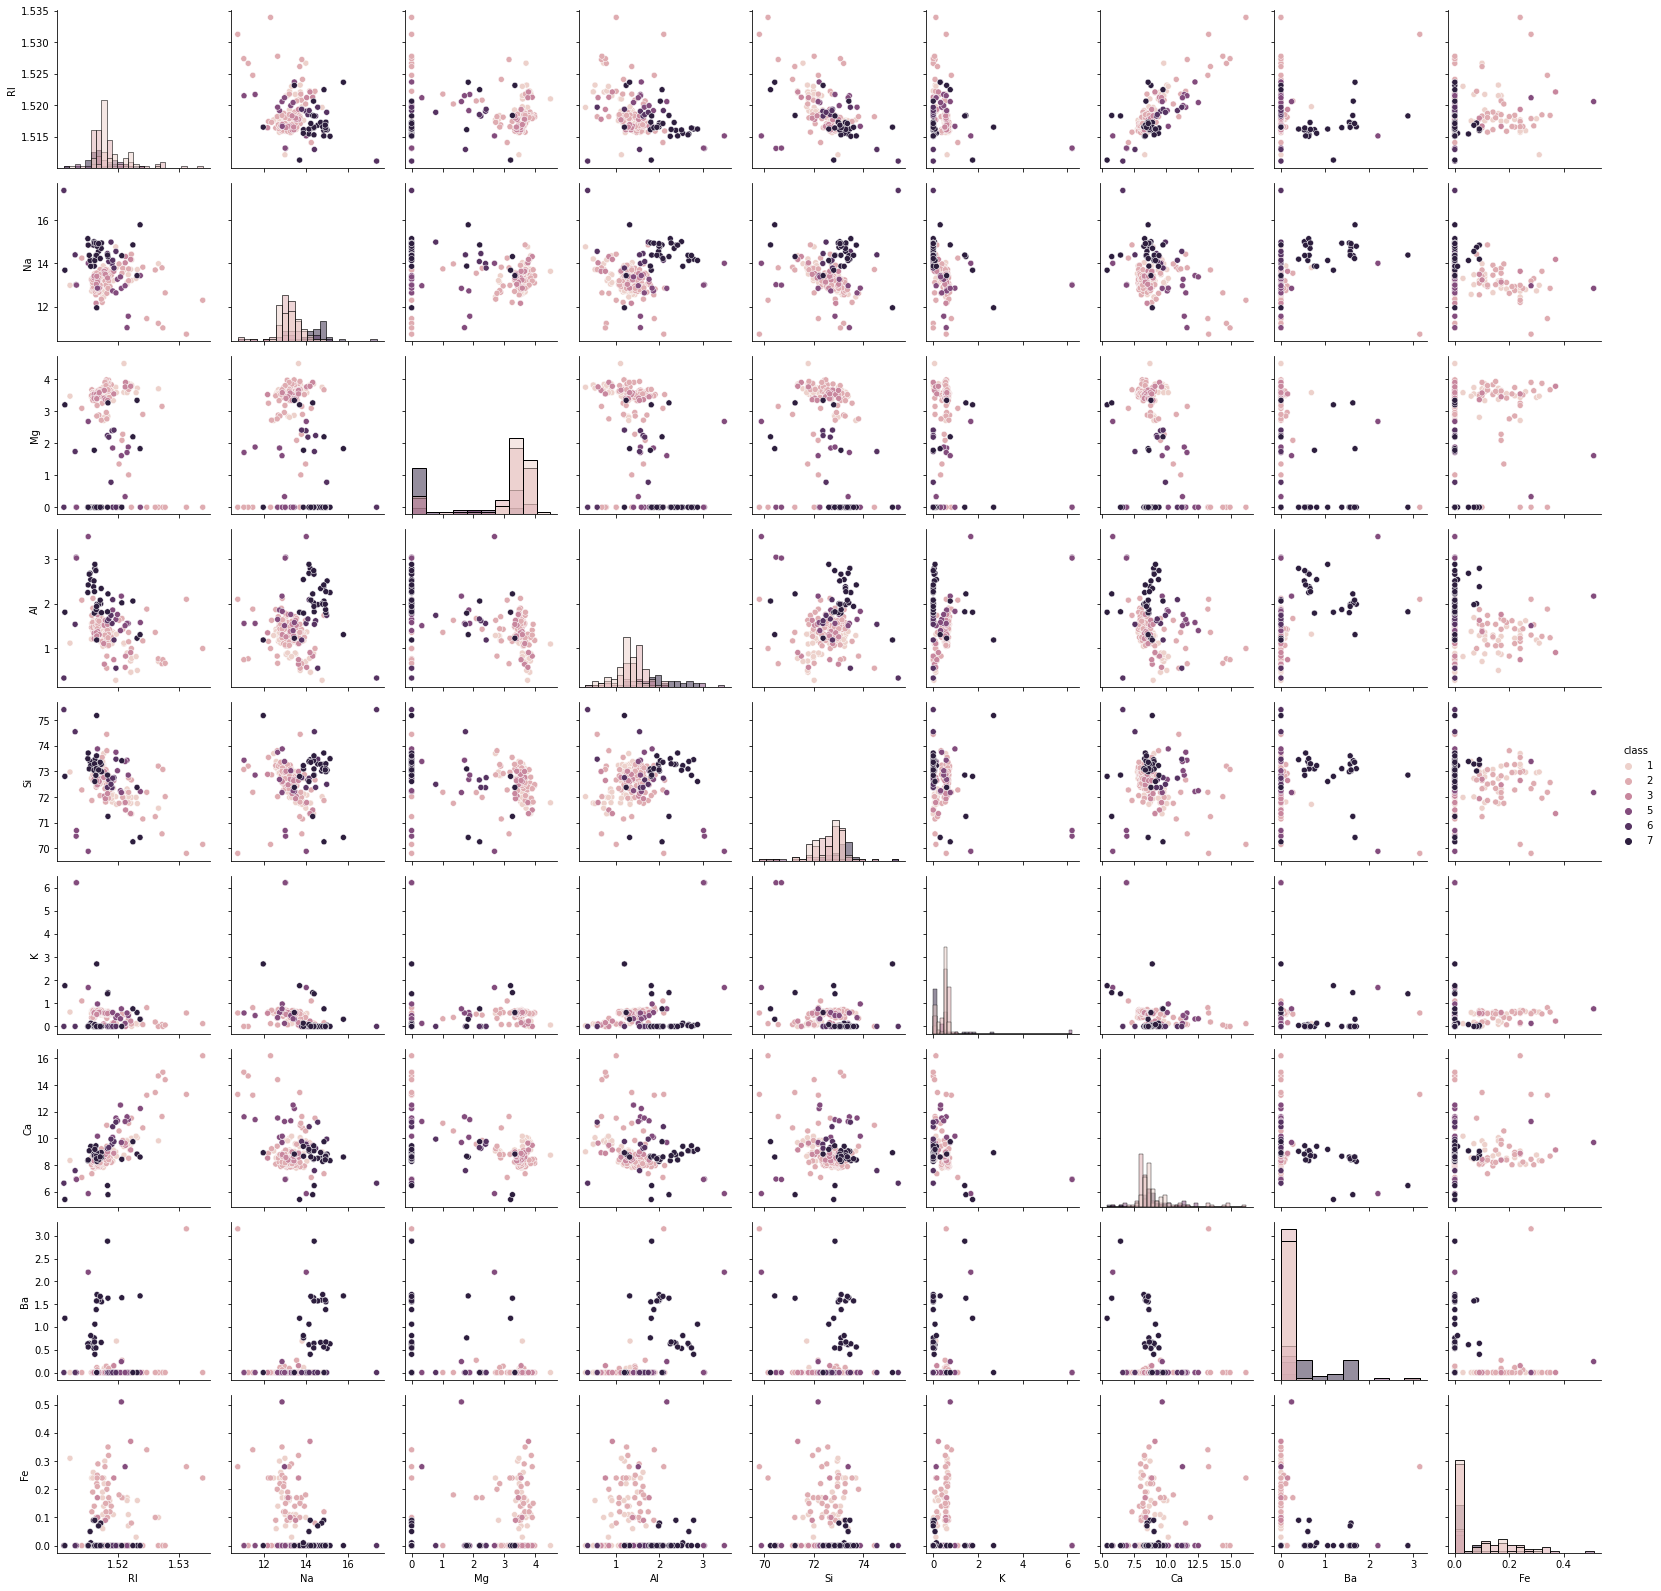

In [16]:
g = sns.PairGrid(glass_data, hue="class")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

### Wykres zależności Ba/Na

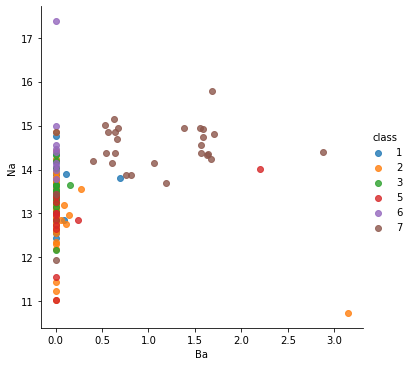

In [17]:
sns.lmplot(x="Ba", y="Na", data=glass_data, hue="class", fit_reg=False)

### PCA

In [18]:
x_standardized = StandardScaler().fit_transform(glass_x)

pca = PCA(n_components = 2)
x_pc = pca.fit_transform(x_standardized)

x_pc_data = pd.DataFrame(data=x_pc, columns=["pc-1", "pc-2"])
x_pc_data = pd.concat([x_pc_data, glass_y], axis=1)

x_pc_data.head()

pc-1      pc-2  class
0  1.151140 -0.529488      1
1 -0.574137 -0.759788      1
2 -0.940160 -0.929836      1
3 -0.142083 -0.961677      1
4 -0.351092 -1.091249      1

Projekcja na 2 główne składowe zachowuje 50.7% wariancji zbioru. Jest to zdecydowanie mniej niż przy zbiorze Iris. Głównym powodem takiego zachowania jest prawdopodobnie większa ilość atrybutów jak i klas.

In [19]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.27901819 0.2277858 ]
0.5068039901112686


Wizualizacja danych po projekcji.

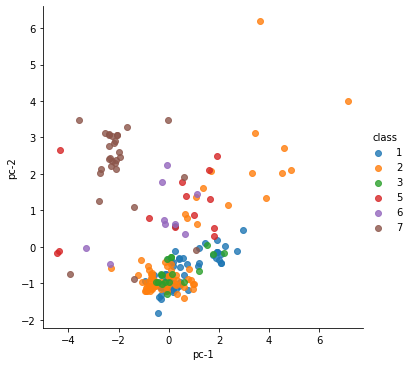

In [20]:
sns.lmplot(x="pc-1", y="pc-2", data=x_pc_data, hue="class", fit_reg=False)

Dane nie są zbyt dobrze rozdzielone przy użyciu 2 komponent. Wykonajmy dekompozycję na 3 składowe.

Projekcja na 3 główne składowe zachowuje 66.3% wariancji zbioru - poziom 15% wariancji zawarty na 3 składowej zdaje się być wystarczająco wysoki aby zaliczyć tą składową do analizy.

In [33]:
x_standardized = StandardScaler().fit_transform(glass_x)

pca = PCA(n_components = 3)
x_pc = pca.fit_transform(x_standardized)

x_pc_data = pd.DataFrame(data=x_pc, columns=["pc-1", "pc-2", "pc-3"])
x_pc_data = pd.concat([x_pc_data, glass_y], axis=1)

print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.27901819 0.2277858  0.15609378]
0.6628977672206734


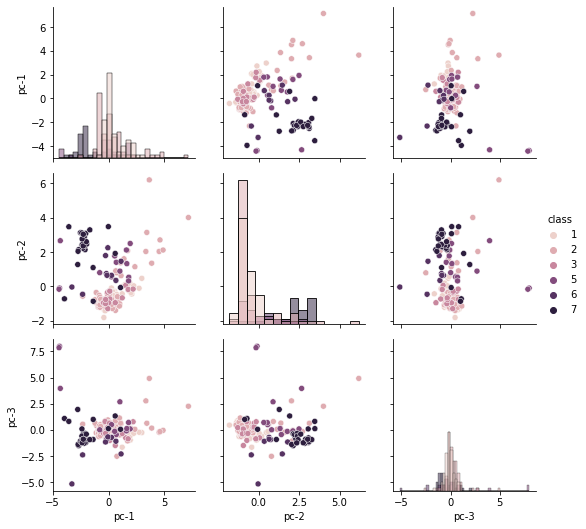

In [35]:
g = sns.PairGrid(x_pc_data, hue="class")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

Dekompozycja na 3 składowe lepiej odseparowuje klasy, co pozwala na późniejsze lepsze działanie algorytmu klasyfikującego.

# WINE

In [23]:
dir = "zbiory/wine.data"
wine_data = pd.read_csv(
    dir, 
    names=[
        "class", "Alcohol", "Malic acid", "Ash", "Alcanity of ash", "Magnesium", 
        "Total phenols", "Flavanoids", "Nonflavanoid phenosis", "Proanthocyanins",
        "Color intensity", "Hue", "OD280/OD315 of diluted wine", "Proline"
    ]
)

wine_data = wine_data[list(wine_data.columns.values)[1:] + ["class"]]
wine_data.head()

Alcohol  Malic acid   Ash  Alcanity of ash  Magnesium  Total phenols  \
0    14.23        1.71  2.43             15.6        127           2.80   
1    13.20        1.78  2.14             11.2        100           2.65   
2    13.16        2.36  2.67             18.6        101           2.80   
3    14.37        1.95  2.50             16.8        113           3.85   
4    13.24        2.59  2.87             21.0        118           2.80   

   Flavanoids  Nonflavanoid phenosis  Proanthocyanins  Color intensity   Hue  \
0        3.06                   0.28             2.29             5.64  1.04   
1        2.76                   0.26             1.28             4.38  1.05   
2        3.24                   0.30             2.81             5.68  1.03   
3        3.49                   0.24             2.18             7.80  0.86   
4        2.69                   0.39             1.82             4.32  1.04   

   OD280/OD315 of diluted wine  Proline  class  
0                         3.92     1065      1  
1                         3.40     1050      1  
2                         3.17     1185      1  
3                         3.45     1480      1  
4                         2.93      735      1

In [24]:
wine_x, wine_y = wine_data.loc[:, wine_data.columns != 'class'], wine_data.loc[:, wine_data.columns == "class"]

### Klasy

class
1        59
2        71
3        48
dtype: int64


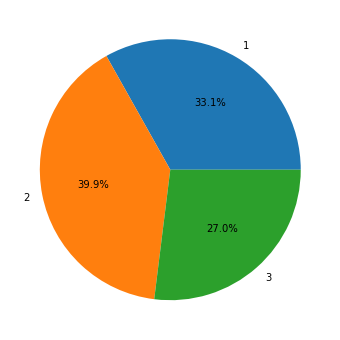

In [25]:
y_counts = wine_y.value_counts().sort_index()

print(y_counts)

fig = plt.figure(figsize=(6, 6))
fig.set_facecolor('white')
plt.pie(y_counts, labels=y_counts.index.get_level_values(0), autopct='%1.1f%%')
plt.show()

Zbiór WINE zawiera reprezentantów 3 różnych klas rodzajów win. Jedyne co wiemy o klasach na podstawie opisu zbioru to to, że każde z win pochodzi z innej odmiany winogron z Włoch.
Ilość reprezentantów dla klas jest różna, ale dosyć podobna - klasy są dużo lepiej zbalansowane niż to miało miejsce w zbiorze GLASS.

### Atrybuty

Każdy typ wina jest reprezentowany przez wektor długości 13. Atrybuty przedstawiają własności chemiczne wina takie jak poziom alkoholu, poziom obecności poszczególnych pierwiastków czy kolor i intensywność.

In [26]:
wine_x.describe()

Alcohol  Malic acid         Ash  Alcanity of ash   Magnesium  \
count  178.000000  178.000000  178.000000       178.000000  178.000000   
mean    13.000618    2.336348    2.366517        19.494944   99.741573   
std      0.811827    1.117146    0.274344         3.339564   14.282484   
min     11.030000    0.740000    1.360000        10.600000   70.000000   
25%     12.362500    1.602500    2.210000        17.200000   88.000000   
50%     13.050000    1.865000    2.360000        19.500000   98.000000   
75%     13.677500    3.082500    2.557500        21.500000  107.000000   
max     14.830000    5.800000    3.230000        30.000000  162.000000   

       Total phenols  Flavanoids  Nonflavanoid phenosis  Proanthocyanins  \
count     178.000000  178.000000             178.000000       178.000000   
mean        2.295112    2.029270               0.361854         1.590899   
std         0.625851    0.998859               0.124453         0.572359   
min         0.980000    0.340000               0.130000         0.410000   
25%         1.742500    1.205000               0.270000         1.250000   
50%         2.355000    2.135000               0.340000         1.555000   
75%         2.800000    2.875000               0.437500         1.950000   
max         3.880000    5.080000               0.660000         3.580000   

       Color intensity         Hue  OD280/OD315 of diluted wine      Proline  
count       178.000000  178.000000                   178.000000   178.000000  
mean          5.058090    0.957449                     2.611685   746.893258  
std           2.318286    0.228572                     0.709990   314.907474  
min           1.280000    0.480000                     1.270000   278.000000  
25%           3.220000    0.782500                     1.937500   500.500000  
50%           4.690000    0.965000                     2.780000   673.500000  
75%           6.200000    1.120000                     3.170000   985.000000  
max          13.000000    1.710000                     4.000000  1680.000000

Na przekątnej przedstawione są histogramy wartości poszczególnych atrybutów z podziałem na klasy.  
W pozostałych komórkach pokazana jest zależność pomiędzy parami atrybutów.

Można zauważyć, że klasa 1 jest łatwo odzielalna na podstawie od pozostałych klas na podstawie atrybutu przedstawiającego zawartość proliny (proline).

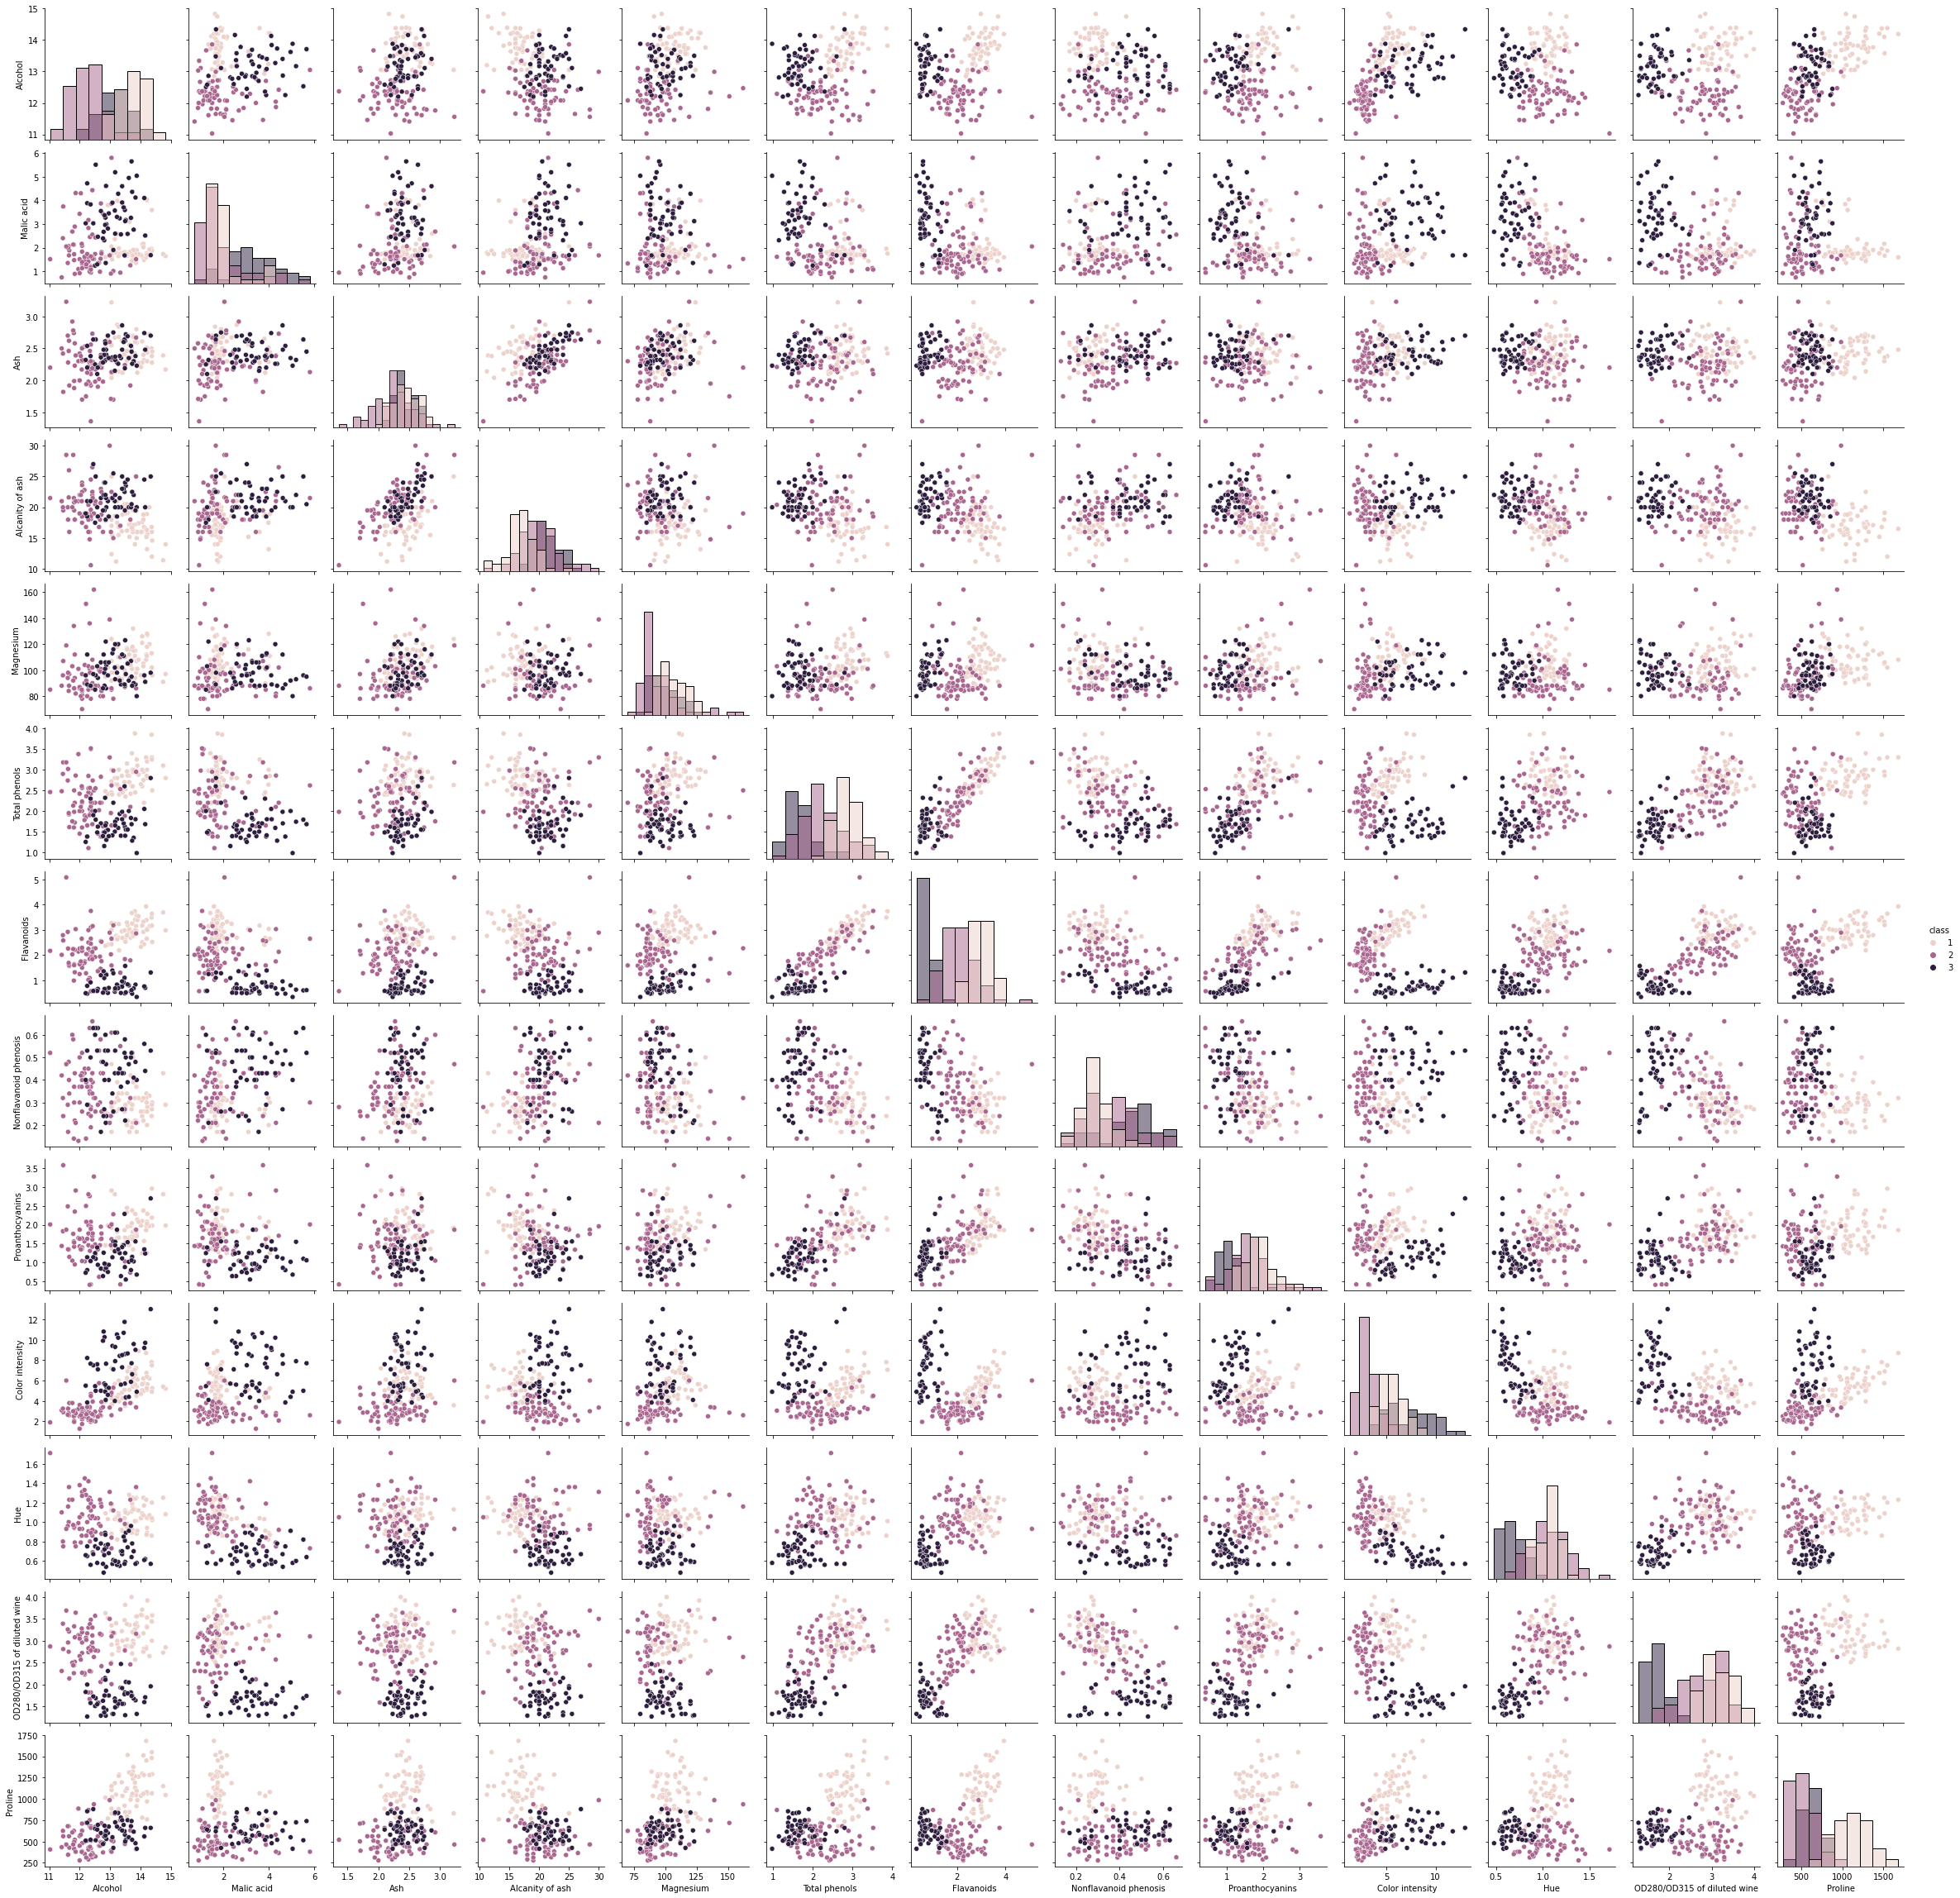

In [27]:
g = sns.PairGrid(wine_data, hue="class")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

### Wykres zależności flawanoidów/poliny

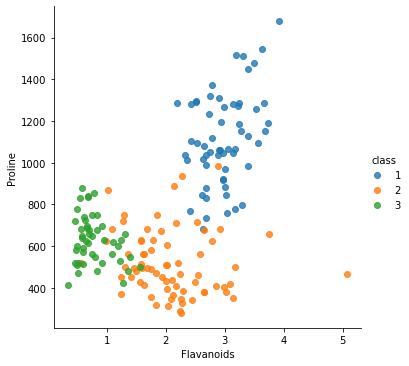

In [28]:
sns.lmplot(x="Flavanoids", y="Proline", data=wine_data, hue="class", fit_reg=False)

### PCA

In [29]:
x_standardized = StandardScaler().fit_transform(wine_x)

pca = PCA(n_components = 2)
x_pc = pca.fit_transform(x_standardized)

x_pc_data = pd.DataFrame(data=x_pc, columns=["pc-1", "pc-2"])
x_pc_data = pd.concat([x_pc_data, wine_y], axis=1)

x_pc_data.head()

pc-1      pc-2  class
0  3.316751 -1.443463      1
1  2.209465  0.333393      1
2  2.516740 -1.031151      1
3  3.757066 -2.756372      1
4  1.008908 -0.869831      1

Projekcja na 2 główne składowe zachowuje 55.4% wariancji zbioru. Jest to zdecydowanie mniej niż przy zbiorze Iris i minimalnie więcej niż na zbiorze GLASS (o 5 pkt. %). Mimo to, patrząc na wizualizacje projekcji, separowalność klas jest na znacznie wyższym poziomie niż było to dla zbioru GLASS. Prawdopodbnie rolę gra tu ilość klas oraz dobry ich balans.

In [30]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.36198848 0.1920749 ]
0.5540633835693528


Wizualizacja danych po projekcji

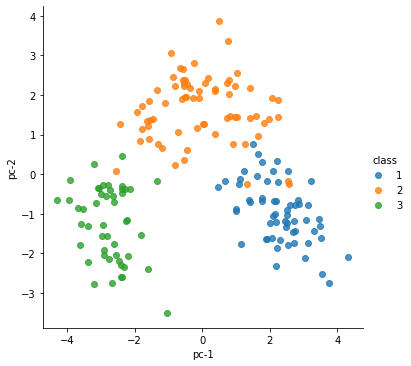

In [31]:
sns.lmplot(x="pc-1", y="pc-2", data=x_pc_data, hue="class", fit_reg=False)

# Pytania

### 1. Czym się różnią zbiory danych analizowane w treści zadania? Na czym może polegać „trudność” analizy. Który z nich wydaje się być łatwiejszy/trudniejszy?

Odp: Zbiory analizowane w zadaniu różnią się ilością atrybutów, klas oraz ich balansem. Trudność analizy może głównie polegać na źle zbalansowanym rozkładzie klas w zbiore - zbiór GLASS. Dodatkowym problemem może być duża ilość atrybutów dla zbioru przy małej ilości reprezentantów - zbiór WINE. Zbiór Iris jest zdecydowanie najłatwiejszy, natomiast GLASS zdaje się być najtrudniejszy ze względu na większą ilość klas ich słaby balans oraz taką samą ilość reprezentantów jak ma to miejsce dla pozostałych zbiorów (a klas jest więcej).

### 2. Czy nierównomierny rozkład klas w zbiorze może stanowić problem dla analizy i dalszej budowy modelu danych?

Odp. Tak, model może overfittować się na klasy z wieloma przypadkami, gdy optymalizacja nie będzie odpowiednio ważone - błędy na reprezentantch klasy z większą ich ilością mniej wpływają na potecjalną funckję straty. Dodatkowo klasa z małą ilością reprezentantów gorzej reprezentuje prawdziwy rozkład i potencjalni outlierzy w posiadanym zbiorze mają większy wpływ na działanie optymalizatora. 

### 3. Jak działa PCA i kiedy warto go stosować? 

Odp: PCA polega na liczeniu macierzy kowariancji atrybutów, a następnie wyznaczania wektora własnego z największą wartości własną owej macierzy. Wektor własny $\mathbf{e}$ macierzy $\mathbf{A}$ ma następującą własność: $\mathbf{A}\mathbf{e} = \lambda\mathbf{e}$, gdzie $\lambda$ jest skalarem. Wektor własny danej macierzy to taki, który po przemnożeniu przez nia nie spada z prostej, na której leży - zmienia się tylko jego długość i zwrot, a nie kierunek. Największy wektor własny macierzy kowariancji przedstawia kierunek największej wariancji w zbiorze. W taki sposób wyznaczany jest nowy atrybut, który zawiera najwięcej informacji ile jednowymiarowy atrybut przedstawiać może. Szukanie kolejnych składowych odbywa się w ten sam sposób co opisany powyżej po ówczesnym usunięciu poprzednich składowych z danych. PCA warto stosować gdy mamy doczynienia z wielowymiarowymi danymi, możemy znacznie zmniejszyć ich wymiarowość równocześnie zachowując jak najwięcej informacji ile jest zawartych we wszystkich atrybutach co ułatwia optymalizację oraz nie degraduje minimum globalnego, które możemy osiągnąć.